In [1]:
import plotly
import plotly.graph_objs as go
import plotly.express as px 
import pandas as pd 
from plotly.offline import init_notebook_mode, iplot

init_notebook_mode(connected=True)  

### Goal
1. Data
- X: ParentLocation (dummy encode), country related (Socioeconomics, Happiness related), tax related (to be added)
- y: value (Percentage of smokers in a country)


In [2]:
data_dir = 'Datasets/'
ww_df = pd.read_csv(data_dir + 'extra_ww.csv')
ww_df = ww_df[ww_df['Gender'] == 'Both sexes'].reset_index(drop=True)
print("Columns", ww_df.columns)
num_cols = [
    'Year',
    'arg', 'cpi', 'edu', 'employ',
    'exchange', 'gdp', 'green', 'income', 'pop', 'tax', 'LifeLadder',
    'LogGDPPerCapita', 'SocialSupport', 'Expectancy', 'Freedom',
    'Generosity', 'Corruption', 'PositiveAffect', 'NegativeAffect'
]
cat_col = ['ParentLocation']

# One-Hot encode categorical variables
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(ww_df[cat_col])
print("Categories", enc.categories_)

# Merge One-Hot varables with original dataset
enc_df = pd.DataFrame(enc.fit_transform(ww_df[cat_col]).toarray())
enc_df.columns = enc.categories_[0]
ww_df = ww_df.join(enc_df)
ww_df

Columns Index(['ParentLocationCode', 'ParentLocation', 'SpatialDimValueCode',
       'Location', 'Year', 'Gender', 'Value', 'arg', 'cpi', 'edu', 'employ',
       'exchange', 'gdp', 'green', 'income', 'pop', 'tax', 'LifeLadder',
       'LogGDPPerCapita', 'SocialSupport', 'Expectancy', 'Freedom',
       'Generosity', 'Corruption', 'PositiveAffect', 'NegativeAffect'],
      dtype='object')
Categories [array(['Africa', 'Americas', 'Eastern Mediterranean', 'Europe',
       'South-East Asia', 'Western Pacific'], dtype=object)]


,ParentLocationCode,ParentLocation,SpatialDimValueCode,Location,Year,Gender,Value,arg,cpi,edu,...,Generosity,Corruption,PositiveAffect,NegativeAffect,Africa,Americas,Eastern Mediterranean,Europe,South-East Asia,Western Pacific
0,AFR,Africa,SWZ,Eswatini,2018,Both sexes,10.7,71.046512,162.597556,NaN,...,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0
1,AMR,Americas,BHS,Bahamas,2018,Both sexes,10.9,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0
2,AMR,Americas,JAM,Jamaica,2018,Both sexes,11.0,40.997230,156.384563,82.288673,...,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0
3,AFR,Africa,TCD,Chad,2018,Both sexes,11.8,39.896760,118.853387,20.210279,...,0.024,0.763,0.553,0.544,1.0,0.0,0.0,0.0,0.0,0.0
4,AFR,Africa,KEN,Kenya,2018,Both sexes,11.8,48.546930,180.514812,NaN,...,0.291,0.844,0.759,0.237,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1336,WPR,Western Pacific,KIR,Kiribati,2000,Both sexes,67.9,41.975309,NaN,63.526821,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,1.0
1337,AFR,Africa,NGA,Nigeria,2000,Both sexes,7.3,72.668138,29.600732,24.609409,...,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0
1338,AFR,Africa,NER,Niger,2000,Both sexes,7.9,29.209758,77.995180,6.591920,...,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0
1339,WPR,Western Pacific,NRU,Nauru,2000,Both sexes,71.0,20.000000,NaN,49.182758,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,1.0


In [3]:
min_year = ww_df['Year'].min() - 1
ww_df['YearInd'] = ww_df['Year'] - min_year
ww_df

,ParentLocationCode,ParentLocation,SpatialDimValueCode,Location,Year,Gender,Value,arg,cpi,edu,...,Corruption,PositiveAffect,NegativeAffect,Africa,Americas,Eastern Mediterranean,Europe,South-East Asia,Western Pacific,YearInd
0,AFR,Africa,SWZ,Eswatini,2018,Both sexes,10.7,71.046512,162.597556,NaN,...,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,19
1,AMR,Americas,BHS,Bahamas,2018,Both sexes,10.9,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,19
2,AMR,Americas,JAM,Jamaica,2018,Both sexes,11.0,40.997230,156.384563,82.288673,...,NaN,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,19
3,AFR,Africa,TCD,Chad,2018,Both sexes,11.8,39.896760,118.853387,20.210279,...,0.763,0.553,0.544,1.0,0.0,0.0,0.0,0.0,0.0,19
4,AFR,Africa,KEN,Kenya,2018,Both sexes,11.8,48.546930,180.514812,NaN,...,0.844,0.759,0.237,1.0,0.0,0.0,0.0,0.0,0.0,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1336,WPR,Western Pacific,KIR,Kiribati,2000,Both sexes,67.9,41.975309,NaN,63.526821,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,1.0,1
1337,AFR,Africa,NGA,Nigeria,2000,Both sexes,7.3,72.668138,29.600732,24.609409,...,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,1
1338,AFR,Africa,NER,Niger,2000,Both sexes,7.9,29.209758,77.995180,6.591920,...,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,1
1339,WPR,Western Pacific,NRU,Nauru,2000,Both sexes,71.0,20.000000,NaN,49.182758,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,1.0,1


In [4]:
# Linear Regression of Y ~ ParentLocation (One-Hot encoded)
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(ww_df[enc_df.columns], ww_df['Value'])
reg.score(ww_df[enc_df.columns], ww_df['Value'])
reg.coef_, reg.intercept_

(array([-1.73032019e+13, -1.73032019e+13, -1.73032019e+13, -1.73032019e+13,
        -1.73032019e+13, -1.73032019e+13]),
 17303201910278.543)

In [5]:
# Numerical columns
# 1. How are we going to use the `Year` factor?
# 2. Should we have scaling factors for gdp/cpi/.. across different years?
# 3. Scale to [0, 1] per numerical variable
# 4. Fillin NA values with 0/mean?
# 5. Correlation between each X variables with Y?

In [6]:
len(num_cols)

20

In [7]:
ww_df_no_na = ww_df.fillna(ww_df.mean())
ww_df_ts = ww_df[(ww_df['Year'] >= 2013) & (ww_df['Year'] <= 2018)]

/var/folders/zj/tt81l0514dz6scn3b7yjkwd00000gn/T/ipykernel_3812/1180208658.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



In [8]:
# from plotly.subplots import make_subplots
# import plotly.graph_objects as go
# nrows, ncols = 4, 5
# fig = make_subplots(rows=nrows, cols=ncols)

# for i in range(len(num_cols)):
# #     i = 0 -> 1, 1
# #     i = 1 -> 1, 2
# #     i = 2 -> 1, 3
# #     i = 3 -> 1, 4
# #     i = 4 -> 2, 5

#     fig.add_trace(
#         go.Scatter(x=ww_df_no_na[num_cols[i]], y=ww_df_no_na['Value']),
#         row=1+i//ncols,
#         col=1+i%ncols
#     )


#     fig.show()

In [9]:
# from matplotlib import pyplot as plt
# import seaborn as sns

# sns.set(rc = {'figure.figsize':(25,20)})

# fig, axes = plt.subplots(nrows, ncols)

# for i in range(len(num_cols)):
#     row=i//ncols,
#     col=i%ncols
#     sns.scatterplot(ax=axes[row][col], data=ww_df_ts, x=num_cols[i], y="Value")
#     col_name = num_cols[i]
#     sns.regplot(ax=axes[row][col], data=ww_df_ts, x=col_name, y="Value")
#     axes[row][col].set_xlabel(num_cols[i])

In [10]:
import numpy as np
log_cols = ['cpi', 'exchange', 'gdp', 
            'green', 'income', 'pop']
for col in log_cols:
    log_col_name = 'cbrt_' + col
    ww_df_ts[log_col_name] = np.cbrt(ww_df_ts[col])
ww_df_ts

/var/folders/zj/tt81l0514dz6scn3b7yjkwd00000gn/T/ipykernel_3812/3197307422.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,ParentLocationCode,ParentLocation,SpatialDimValueCode,Location,Year,Gender,Value,arg,cpi,edu,...,Europe,South-East Asia,Western Pacific,YearInd,cbrt_cpi,cbrt_exchange,cbrt_gdp,cbrt_green,cbrt_income,cbrt_pop
0,AFR,Africa,SWZ,Eswatini,2018,Both sexes,10.7,71.046512,162.597556,NaN,...,0.0,0.0,0.0,19,5.458056,2.365355,16.012877,14.612287,14.761968,104.350457
1,AMR,Americas,BHS,Bahamas,2018,Both sexes,10.9,NaN,NaN,NaN,...,0.0,0.0,0.0,19,NaN,NaN,NaN,NaN,NaN,NaN
2,AMR,Americas,JAM,Jamaica,2018,Both sexes,11.0,40.997230,156.384563,82.288673,...,0.0,0.0,0.0,19,5.387632,5.051096,17.500673,21.558700,16.807583,143.173327
3,AFR,Africa,TCD,Chad,2018,Both sexes,11.8,39.896760,118.853387,20.210279,...,0.0,0.0,0.0,19,4.916664,8.220169,8.988260,43.210434,8.071403,249.212063
4,AFR,Africa,KEN,Kenya,2018,Both sexes,11.8,48.546930,180.514812,NaN,...,0.0,0.0,0.0,19,5.651594,4.661640,11.953527,42.877604,11.224114,371.792061
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
889,AMR,Americas,HTI,Haiti,2013,Both sexes,9.1,66.763425,116.989655,NaN,...,0.0,0.0,0.0,14,4.890829,3.515922,11.170768,20.800838,10.981784,218.283278
890,AFR,Africa,CMR,Cameroon,2013,Both sexes,9.5,20.625754,107.940605,53.406380,...,0.0,0.0,0.0,14,4.761330,7.904594,11.359058,44.080088,10.577693,280.531728
891,AFR,Africa,LBR,Liberia,2013,Both sexes,9.6,18.716154,124.681935,NaN,...,0.0,0.0,0.0,14,4.995756,4.263876,8.970809,19.247006,7.712950,161.959460
892,EMR,Eastern Mediterranean,OMN,Oman,2013,Both sexes,9.6,4.586430,108.228932,99.515701,...,0.0,0.0,0.0,14,4.765566,0.727164,27.530341,40.872497,21.818764,155.565813


In [ ]:
# log_cols_set = set(log_cols)

In [ ]:
# from matplotlib import pyplot as plt
# import seaborn as sns
# import numpy as np

# sns.set(rc = {'figure.figsize':(25,20)})

# fig, axes = plt.subplots(nrows, ncols)
# # exchange?

# for i in range(len(num_cols)):
#     row=i//ncols,
#     col=i%ncols
#     col_name = num_cols[i]
#     if col_name in log_cols_set:
#         col_name = 'cbrt_' + col_name
#     sns.regplot(ax=axes[row][col], data=ww_df_ts, x=col_name, y="Value") # note: we should exclude log dgp (original variable!!!)
#     axes[row][col].set_xlabel(col_name)

In [ ]:
# 1. PCA + LR

In [ ]:
# 2. Tree Based Modelling

In [ ]:
# ww_df_2018.count()/len(ww_df_2018)

In [ ]:
# ww_df.groupby("Year").size()

# you assume year is included in socioeconomics
# value = LR(gdp, pca, ...) no year in your LR

# you assume previous year affect the other
# PCA to consolidate features


In [ ]:
# 1. _feature_importance (Tree based - k - 0)
# 2. forward/backward selection

# 3. If you are a policy maker
# given you're in this geolocation of the world, with gdp, mpi as ___, __, 
# what measures are most effective (group by; train separate model), what features to look at for if you were to make
# policy for different countries (if you're UN, etc.)

# pay attention to that year's socieceonmic status  (can apply to all variables!!!)
# compare with worldwide average gdp for this year
# compare with this country's and the world's past gdp (for 3 years)


In [ ]:
# Model 1: No year account LR 
# get rid of duplicates
# want to construct LR
# 1. Linearity (get ride of arg, exchange, cpi, green, generosity)
# 2. Homoscedasticity (get rid of corruption)
# 3. Independent data (bg knowledge)
# 4. Normality (qq plot)

# X: 
# - Categorical
# - Numerical: 
# edu,
# employ, 
# log gdp, 
# cube(income), 
# pop
# tax
# -------happiness-------
# lifeladder
# social support
# expectance
# freedom
# pos affect
# negative affect

# raw/transformed var 


# Model 2: + constructed feature  (Why Lasso not Ridge, bc we want feature selection, not small enf coeffs)

In [11]:
from sklearn import preprocessing

# get rid of mean value
ww_df_ts = ww_df_ts.fillna(ww_df_ts.mean())
num_cols_m1 = ['edu', 'employ', 'LogGDPPerCapita', 'cbrt_income', 'pop', 'tax']
pca_cols_m1 = ['LifeLadder', 'SocialSupport', 'Expectancy', 'Freedom', 'PositiveAffect', 'NegativeAffect']
cat_cols_m1 = list(enc_df.columns)
# normalize data
# ww_df_ts[num_cols_m1+pca_cols_m1] = ww_df_ts[num_cols_m1+pca_cols_m1] \
#                                     .apply(lambda x: (x-x.min())/ x.max()-x.min(), axis=0)

scaler = preprocessing.MinMaxScaler()
data_scaled = scaler.fit_transform(ww_df_ts[num_cols_m1+pca_cols_m1])
data_normalized = pd.DataFrame(data_scaled, columns = [num_cols_m1+pca_cols_m1])
ww_df_ts[num_cols_m1+pca_cols_m1] = data_normalized
ww_df_ts


/var/folders/zj/tt81l0514dz6scn3b7yjkwd00000gn/T/ipykernel_3812/3410249336.py:4: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



,ParentLocationCode,ParentLocation,SpatialDimValueCode,Location,Year,Gender,Value,arg,cpi,edu,...,Europe,South-East Asia,Western Pacific,YearInd,cbrt_cpi,cbrt_exchange,cbrt_gdp,cbrt_green,cbrt_income,cbrt_pop
0,AFR,Africa,SWZ,Eswatini,2018,Both sexes,10.7,71.046512,162.597556,0.508801,...,0.0,0.0,0.0,19,5.458056,2.365355,16.012877,14.612287,0.242478,104.350457
1,AMR,Americas,BHS,Bahamas,2018,Both sexes,10.9,41.640697,127.729947,0.508801,...,0.0,0.0,0.0,19,5.003564,4.668050,21.012194,41.954306,0.369193,245.138227
2,AMR,Americas,JAM,Jamaica,2018,Both sexes,11.0,40.997230,156.384563,0.447146,...,0.0,0.0,0.0,19,5.387632,5.051096,17.500673,21.558700,0.296962,143.173327
3,AFR,Africa,TCD,Chad,2018,Both sexes,11.8,39.896760,118.853387,0.026791,...,0.0,0.0,0.0,19,4.916664,8.220169,8.988260,43.210434,0.064277,249.212063
4,AFR,Africa,KEN,Kenya,2018,Both sexes,11.8,48.546930,180.514812,0.508801,...,0.0,0.0,0.0,19,5.651594,4.661640,11.953527,42.877604,0.148248,371.792061
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
889,AMR,Americas,HTI,Haiti,2013,Both sexes,9.1,66.763425,116.989655,0.508801,...,0.0,0.0,0.0,14,4.890829,3.515922,11.170768,20.800838,0.141794,218.283278
890,AFR,Africa,CMR,Cameroon,2013,Both sexes,9.5,20.625754,107.940605,0.251573,...,0.0,0.0,0.0,14,4.761330,7.904594,11.359058,44.080088,0.131031,280.531728
891,AFR,Africa,LBR,Liberia,2013,Both sexes,9.6,18.716154,124.681935,0.508801,...,0.0,0.0,0.0,14,4.995756,4.263876,8.970809,19.247006,0.054729,161.959460
892,EMR,Eastern Mediterranean,OMN,Oman,2013,Both sexes,9.6,4.586430,108.228932,0.563796,...,0.0,0.0,0.0,14,4.765566,0.727164,27.530341,40.872497,0.430433,155.565813


In [12]:
from sklearn import decomposition

pca = decomposition.PCA(n_components=3)
pca.fit(ww_df_ts[pca_cols_m1])
pca_trans_cols_m1 = pca.transform(ww_df_ts[pca_cols_m1])
pca_lst = ['pca_1', 'pca_2', 'pca_3']
ww_df_ts[pca_lst] = pca_trans_cols_m1
X_m1 = ww_df_ts[num_cols_m1 + cat_cols_m1 + pca_lst]
X_m1

,edu,employ,LogGDPPerCapita,cbrt_income,pop,tax,Africa,Americas,Eastern Mediterranean,Europe,South-East Asia,Western Pacific,pca_1,pca_2,pca_3
0,0.508801,0.479838,0.569910,0.242478,0.000809,0.460127,1.0,0.0,0.0,0.0,0.0,0.0,-9.361449e-17,-7.850447e-17,-2.477469e-17
1,0.508801,0.479838,0.569910,0.369193,0.033583,0.460127,0.0,1.0,0.0,0.0,0.0,0.0,-9.361449e-17,-7.850447e-17,-2.477469e-17
2,0.447146,0.492851,0.569910,0.296962,0.002100,0.765212,0.0,1.0,0.0,0.0,0.0,0.0,-9.361449e-17,-7.850447e-17,-2.477469e-17
3,0.026791,0.507733,0.145309,0.064277,0.011106,0.460127,1.0,0.0,0.0,0.0,0.0,0.0,8.538616e-01,2.719212e-02,3.499559e-01
4,0.508801,0.479838,0.341118,0.148248,0.036894,0.428837,1.0,0.0,0.0,0.0,0.0,0.0,1.785922e-01,-2.350394e-01,-3.910390e-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
889,0.508801,0.479838,0.165469,0.141794,0.007461,0.460127,0.0,1.0,0.0,0.0,0.0,0.0,7.319395e-01,-4.884903e-03,-8.536504e-02
890,0.251573,0.479838,0.290419,0.131031,0.015845,0.279250,1.0,0.0,0.0,0.0,0.0,0.0,4.131529e-01,-2.668123e-01,-1.366419e-01
891,0.508801,0.479838,0.569910,0.054729,0.003043,0.460127,1.0,0.0,0.0,0.0,0.0,0.0,-9.361449e-17,-7.850447e-17,-2.477469e-17
892,0.563796,0.479838,0.569910,0.430433,0.002696,0.460127,0.0,0.0,1.0,0.0,0.0,0.0,-9.361449e-17,-7.850447e-17,-2.477469e-17


In [13]:
X_m1[pca_lst].min(), X_m1[pca_lst].max()

(pca_1   -0.718499
 pca_2   -0.403584
 pca_3   -0.399755
 dtype: float64,
 pca_1    0.984042
 pca_2    0.585658
 pca_3    0.440578
 dtype: float64)

In [14]:
Y_m1 = ww_df_ts['Value']

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_m1_train, X_m1_test,Y_m1_train, Y_m1_test = train_test_split(X_m1, Y_m1, test_size =0.2)
lr_model = LinearRegression()
lr_model.fit(X_m1_train, Y_m1_train)
print("Training Accuracy:", lr_model.score(X_m1_train, Y_m1_train))
print("Testing Accuracy:", lr_model.score(X_m1_test, Y_m1_test))

Training Accuracy: 0.5105025449713325
Testing Accuracy: 0.40511550309871525


In [37]:
clf = DecisionTreeRegressor(max_depth=d)
clf_score = cross_val_score(clf, X_m1, Y_m1, cv=cv)
clf_score

array([0.69067599, 0.84632917, 0.81095167, 0.86948274, 0.77441755])

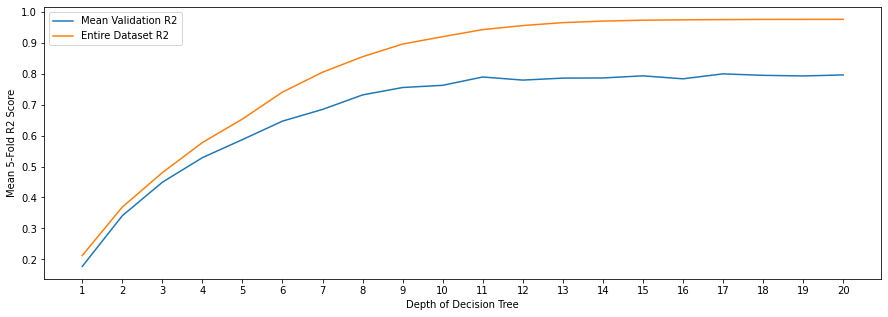

In [38]:

import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor, export_graphviz
import graphviz 
from graphviz import Source

np.random.seed(42) 

cv = 5
d_lst = np.arange(1, 21)
mean_acc_score = []
total_acc_score_lst = []
for d in d_lst:
    # train-test split; calculate validation score
    clf = DecisionTreeRegressor(max_depth=d)
    clf_score = cross_val_score(clf, X_m1, Y_m1, cv=cv) # scoring="R2" by default
    # whole dataset
    clf = DecisionTreeRegressor(max_depth=d)
    clf.fit(X_m1, Y_m1)
    total_acc = clf.score(X_m1, Y_m1)
    mean_clf_score = np.mean(clf_score)
    mean_acc_score.append(mean_clf_score)
    total_acc_score_lst.append(total_acc)

fig, ax = plt.subplots(figsize=(15,5))
ax.plot(d_lst, mean_acc_score, label = "Mean Validation R2")
ax.plot(d_lst, total_acc_score_lst, label = "Entire Dataset R2")

ax.set_xlabel('Depth of Decision Tree')
ax.set_ylabel('Mean %d-Fold R2 Score' % cv)
ax.set_xticks(d_lst)
ax.set_ylim(plt.ylim())
ax.legend()

In [ ]:
# Data: 2013 - 2018
# 2018: 
# raw feature: cn_gdp_18
# construct feature: ww_avg_18, cn_gdp_17, ww_avg_17

# What info can we get from those?
# 1. cn_gdp_18 n
# 2. percentage of change between (cn_gdp_18, cn_gdp_17) and (ww_avg_18, ww_avg_17); 
# 3. difference between (cn_gdp_18, ww_avg_18, ww_sd_18) and (cn_gdp_17, ww_avg_17) / rank / # of S.D away from ww_avg_n


# Methodology:
# 1. ratio

In [ ]:
# Lasso on ww_df
# X: 
# - categorical: ParentLocation (One-Hot)
# - numerical:   
#     - PCA (np.fillna(np.mean)): 

In [ ]:
# 2007, 2010, 2012, 2014 -> 2018

# 2010
# 2014

In [ ]:
# Choosing hyperparameter for delay in year
# Plot to see the change in results
# https://www.nature.com/articles/s41586-020-2404-8